### demographics_static_clean.csv: combine races into three groups: white, black or american, and other
### inpatient_eth: original features + AgeBand + AgeBin
### inpatient_eth2: inpatient_eth features + all demographic features be encoded as labels (ie. 0,1,2..)
### inpatient_eth3: inpatient_eth2 features + all demographic features be encoded as one-hot 

In [162]:
import pandas as pd


import numpy as np
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import preprocessing

In [163]:
path = '/home/bhatti/dataset/VCHAMPS/demographics_static_train.csv'
demographics_static_train = pd.read_csv(path).iloc[:,1:]
demographics_static_train.head()

,Internalpatientid,Ethnicity,Gender,Races,Veteran flag
0,168674,Hispanic or Latino,Male,White,Yes
1,168681,Not Hispanic or Latino,Male,White,Yes
2,168696,Not Hispanic or Latino,Female,Not specified (no value),Yes
3,168711,Not Hispanic or Latino,Male,Other,Yes
4,168720,Not Hispanic or Latino,Male,White,Yes


In [3]:
demographics_static_train.shape

(133252, 5)

## Drop veteran flag == 0 (159 rows)

In [83]:
demographics_static_train = demographics_static_train[demographics_static_train['Veteran flag'] == 'Yes']
demographics_static_train.shape

(133093, 5)

In [30]:
pd.DataFrame(demographics_static_train['Races'].value_counts())

,Races
White,85098
Not specified (no value),22451
Black or African American,16669
Other,6497
White ; Other,1429
Asian,431
Black or African American ; Other,267
Black or African American ; White,198
Asian ; Other,17
White ; Asian,16


## Combine races into 4 classes

In [164]:
def races_combine(data):
    for i in range(len(data['Races'])):
        if  data['Races'].iloc[i] == 'White ; Other':
            data['Races'].iloc[i] = 'White'
        elif data['Races'].iloc[i] == 'Black or African American ; Other':
            data['Races'].iloc[i] = 'Black or African American'
        elif data['Races'].iloc[i] == 'Asian ; Other':
            data['Races'].iloc[i] = 'Asian'
        elif data['Races'].iloc[i] == '(Censored)':
            data['Races'].iloc[i] = 'Other'
        elif data['Races'].iloc[i] == 'Not specified (no value)':
            data['Races'].iloc[i] = 'Other'
        elif data['Races'].iloc[i] == 'Black or African American ; White':
            data['Races'].iloc[i] = 'Black or African American'
        elif data['Races'].iloc[i] == 'Black or African American ; Asian':
            data['Races'].iloc[i] = 'Black or African American'
        elif data['Races'].iloc[i] == 'White ; Asian':
            data['Races'].iloc[i] = 'White'
        elif data['Races'].iloc[i] == 'White ; Asian ; Other':
            data['Races'].iloc[i] = 'White'
        elif data['Races'].iloc[i] == 'Black or African American ; White ; Asian':
            data['Races'].iloc[i] = 'Black or African American'
        elif data['Races'].iloc[i] == 'Black or African American ; White ; Other':
            data['Races'].iloc[i] = 'Black or African American'
        
    return data



In [165]:
demographics_static_train2 = races_combine(demographics_static_train)
demographics_static_train2.head()

/tmp/ipykernel_42038/2746446931.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Races'].iloc[i] = 'Other'
/tmp/ipykernel_42038/2746446931.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Races'].iloc[i] = 'White'
/tmp/ipykernel_42038/2746446931.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Races'].iloc[i] = 'Black or African American'
/tmp/ipykernel_42038/2746446931.py:6: SettingWithCopyWarning: 
A valu

,Internalpatientid,Ethnicity,Gender,Races,Veteran flag
0,168674,Hispanic or Latino,Male,White,Yes
1,168681,Not Hispanic or Latino,Male,White,Yes
2,168696,Not Hispanic or Latino,Female,Other,Yes
3,168711,Not Hispanic or Latino,Male,Other,Yes
4,168720,Not Hispanic or Latino,Male,White,Yes


In [89]:
demographics_static_train2['Races'].value_counts()

White                        86548
Other                        28949
Black or African American    17148
Asian                          448
Name: Races, dtype: int64

In [90]:
demographics_static_train2['Ethnicity'].value_counts()

Not Hispanic or Latino    102278
Not specified              26419
Hispanic or Latino          4396
Name: Ethnicity, dtype: int64

In [91]:
demographics_static_train2['Gender'].value_counts()

Male      129653
Female      3440
Name: Gender, dtype: int64

## Convert Form
One hot encoding Ethnicity

Label Code Races and Ethnicity

1: Male, Female: 0

White: 3, Other: 2, Black or African American: 1, Asian:3

Hispanic or Latino:0, Not Hispanic or Latino: 1, Not specified:2

In [179]:
demographics_static_train3 = demographics_static_train2.copy()
demographics_static_train3['Ethnicity'].replace(['Hispanic or Latino','Not Hispanic or Latino','Not specified'],[0,1,2],inplace=True)
demographics_static_train3['Races'].replace(['White','Other','Black or African American', 'Asian'],[0,1,2,3],inplace=True)
demographics_static_train3['Gender'].replace(['Male','Female'],[1,0],inplace=True)

In [175]:
demographics_static_train3.head()

,Internalpatientid,Ethnicity,Gender,Races,Veteran flag
0,168674,0,1,0,Yes
1,168681,1,1,0,Yes
2,168696,1,0,1,Yes
3,168711,1,1,1,Yes
4,168720,1,1,0,Yes


In [180]:
# One hot encoding races and ethnicity
data_dummy = pd.get_dummies(data = demographics_static_train3, columns = ['Ethnicity','Races'])
data_dummy = data_dummy[['Internalpatientid', 
       'Ethnicity_0', 'Ethnicity_1', 'Ethnicity_2', 'Races_0', 'Races_1',
       'Races_2', 'Races_3']]

In [181]:
demographics_static_train3 = pd.concat([demographics_static_train3,data_dummy.iloc[:,1:]],axis = 1)
demographics_static_train3

,Internalpatientid,Ethnicity,Gender,Races,Veteran flag,Ethnicity_0,Ethnicity_1,Ethnicity_2,Races_0,Races_1,Races_2,Races_3
0,168674,0,1,0,Yes,1,0,0,1,0,0,0
1,168681,1,1,0,Yes,0,1,0,1,0,0,0
2,168696,1,0,1,Yes,0,1,0,0,1,0,0
3,168711,1,1,1,Yes,0,1,0,0,1,0,0
4,168720,1,1,0,Yes,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
133247,168624,1,1,2,Yes,0,1,0,0,0,1,0
133248,168626,1,1,2,Yes,0,1,0,0,0,1,0
133249,168628,1,1,0,Yes,0,1,0,1,0,0,0
133250,168645,1,1,0,Yes,0,1,0,1,0,0,0


In [182]:
demographics_static_train3 = demographics_static_train3.groupby('Internalpatientid').apply(lambda x:x)
demographics_static_train3 = demographics_static_train3.sort_values('Internalpatientid').reset_index(drop =True)
demographics_static_train3

/tmp/ipykernel_42038/2442860510.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  demographics_static_train3 = demographics_static_train3.groupby('Internalpatientid').apply(lambda x:x)


,Internalpatientid,Ethnicity,Gender,Races,Veteran flag,Ethnicity_0,Ethnicity_1,Ethnicity_2,Races_0,Races_1,Races_2,Races_3
0,1,1,1,0,Yes,0,1,0,1,0,0,0
1,2,1,1,2,Yes,0,1,0,0,0,1,0
2,3,2,1,1,Yes,0,0,1,0,1,0,0
3,4,0,1,1,Yes,1,0,0,0,1,0,0
4,5,1,1,0,Yes,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
133247,169060,2,1,1,Yes,0,0,1,0,1,0,0
133248,169061,1,1,0,Yes,0,1,0,1,0,0,0
133249,169062,2,1,0,Yes,0,0,1,1,0,0,0
133250,169063,2,1,1,Yes,0,0,1,0,1,0,0


In [183]:
#demographics_static_train3.to_csv('/home/daisy/FDA_Dataset/demographics_static_clean.csv')

## Merge inpatient and Demographic for EDA

In [8]:
path = '/home/hassan/lily/MLA/FDA/inpatient_admission_withtarget.csv'
inpatient_admissions_train = pd.read_csv(path).iloc[:,1:]
inpatient_admissions_train.head()

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State,Cardiovascular,Readmission
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,Regular,0,1,NaN,1.0,Utah,0,0
1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,Regular,0,1,0.0,0.0,North Carolina,0,1
2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,Regular,0,1,NaN,0.0,North Carolina,0,1
3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,Regular,0,1,NaN,1.0,Florida,0,0
4,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,Regular,0,1,NaN,NaN,Idaho,0,0


In [37]:
def age_category(data):
    data.loc[(data['Age at admission'] > 20) & (data['Age at admission'] <= 40), 'AgeBin'] = 0
    data.loc[(data['Age at admission'] > 40) & (data['Age at admission'] <= 60), 'AgeBin'] = 1
    data.loc[(data['Age at admission'] > 60) & (data['Age at admission'] <= 80), 'AgeBin'] = 2
    data.loc[(data['Age at admission'] > 80) & (data['Age at admission'] <= 100), 'AgeBin'] = 3
    data.loc[(data['Age at admission'] > 100) & (data['Age at admission'] <= 120), 'AgeBin'] = 4
    return data
inpatient_admissions_train = age_category(inpatient_admissions_train)
inpatient_admissions_train.head()

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,Discharge disposition,Died during admission,Outpatientreferralflag,Serviceconnectedflag,Agentorangeflag,State,Cardiovascular,Readmission,AgeBin
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,Regular,0,1,NaN,1.0,Utah,0,0,2.0
1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,Regular,0,1,0.0,0.0,North Carolina,0,1,3.0
2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,Regular,0,1,NaN,0.0,North Carolina,0,1,3.0
3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,Regular,0,1,NaN,1.0,Florida,0,0,2.0
4,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,Regular,0,1,NaN,NaN,Idaho,0,0,3.0


In [112]:
demographics_static_clean = demographics_static_train2.copy()

In [113]:
inpatient_admissions_train['Died during admission'].replace(['No','Yes'],[0,1],inplace=True)

In [114]:
inpatient_admissions_train[['AgeBin', 'Died during admission']].groupby(['AgeBin'], as_index=False).mean().sort_values(by='AgeBin', ascending=True)

,AgeBin,Died during admission
0,0.0,0.005728
1,1.0,0.010273
2,2.0,0.028539
3,3.0,0.063683
4,4.0,0.099156


In [115]:
inpatient_enth = inpatient_admissions_train.merge(demographics_static_clean, how = 'left', suffixes=(' ', ' '), on = 'Internalpatientid')
inpatient_enth.head()

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,...,Serviceconnectedflag,Agentorangeflag,State,Cardiovascular,Readmission,AgeBin,Ethnicity,Gender,Races,Veteran flag
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,...,NaN,1.0,Utah,0,0,2.0,Not Hispanic or Latino,Male,White,Yes
1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,...,0.0,0.0,North Carolina,0,1,3.0,Not Hispanic or Latino,Male,White,Yes
2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,...,NaN,0.0,North Carolina,0,1,3.0,Not Hispanic or Latino,Male,White,Yes
3,10001,70.900369,2020-03-20 02:02:26.0,2020-03-28 08:47:01.0,SURGERY,SURGERY,PLASTIC SURGERY,SURGICAL STEPDOWN,Nonrheumatic mitral (valve) prolapse,Postprocedural shock,...,NaN,1.0,Florida,0,0,2.0,Not Hispanic or Latino,Male,Black or African American,Yes
4,100016,83.054993,1999-11-20 14:23:45.0,1999-12-01 03:57:43.0,MEDICINE,MEDICINE,HEMATOLOGY/ONCOLOGY,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Unspecified mental disorder due to known physi...,...,NaN,NaN,Idaho,0,0,3.0,Not specified,Male,Other,Yes


## Perform Exploratory Analysis with Statistics¶

In [117]:
orig_cols = ['Gender', 'Races', 'AgeBin']

for x in orig_cols:
    print('Survival Correlation by:', x)
    print(inpatient_enth[[x, 'Died during admission']].groupby(x, as_index=False).mean())
    print('-'*10, '\n')

    print('Readmission Correlation by:', x)
    print(inpatient_enth[[x, 'Readmission']].groupby(x, as_index=False).mean())
    print('-'*10, '\n')

Survival Correlation by: Gender
   Gender  Died during admission
0  Female               0.018131
1    Male               0.031798
---------- 

Readmission Correlation by: Gender
   Gender  Readmission
0  Female     0.970538
1    Male     0.969082
---------- 

Survival Correlation by: Races
                       Races  Died during admission
0                      Asian               0.038674
1  Black or African American               0.021279
2                      Other               0.067954
3                      White               0.028375
---------- 

Readmission Correlation by: Races
                       Races  Readmission
0                      Asian     0.959945
1  Black or African American     0.980847
2                      Other     0.934653
3                      White     0.971297
---------- 

Survival Correlation by: AgeBin
   AgeBin  Died during admission
0     0.0               0.005728
1     1.0               0.010273
2     2.0               0.028539
3     3.0     

#### Demographic has a high correlation with readmission

In [63]:
inpatient_enth.columns

Index(['Internalpatientid', 'Age at admission', 'Admission date',
       'Discharge date', 'Admitting unit service', 'Discharging unit service',
       'Admitting specialty', 'Discharging specialty',
       'First listed discharge diagnosis icd10 subcategory',
       'Second listed discharge diagnosis icd10 subcategory',
       'Discharge disposition', 'Died during admission',
       'Outpatientreferralflag', 'Serviceconnectedflag', 'Agentorangeflag',
       'State', 'Hospital readmission', 'AgeBin', 'Ethnicity', 'Gender',
       'Races', 'Veteran flag', 'Gender_Code', 'AgeBin_Code', 'Races_Code'],
      dtype='object')

In [118]:
#we will use seaborn graphics for multi-variable comparison: https://seaborn.pydata.org/api.html

#graph individual features by survival
target = 'Died during admission'
target2 = 'Readmission'
data  = inpatient_enth

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black or African American'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Asian'),
  Text(4, 0, 'Hispanic or Latino')])

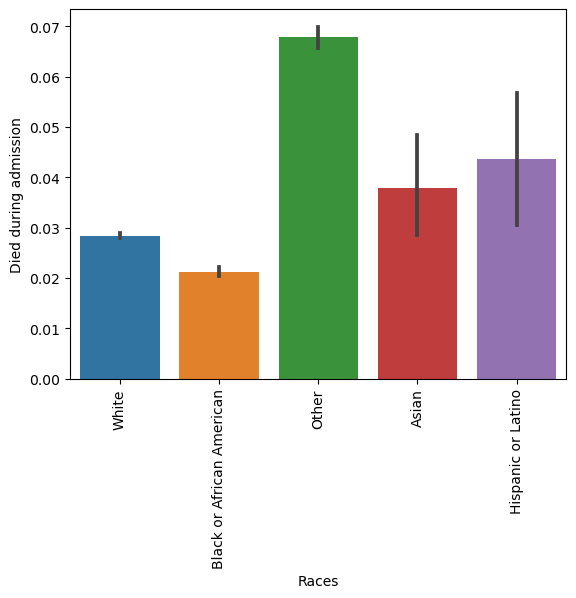

In [23]:
sns.barplot(x = 'Races', y = target,data=data)
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Black or African American'),
  Text(2, 0, 'Other'),
  Text(3, 0, 'Asian'),
  Text(4, 0, 'Hispanic or Latino')])

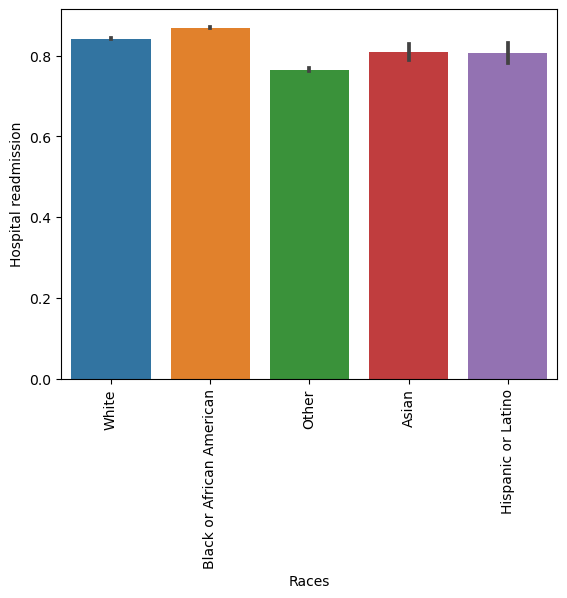

In [97]:
sns.barplot(x = 'Races', y = target2,data=data)
plt.xticks(rotation=90)

<Axes: xlabel='Gender', ylabel='Died during admission'>

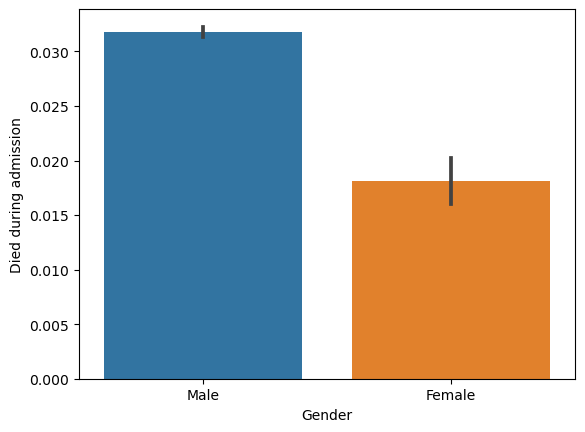

In [24]:
sns.barplot(x = 'Gender', y = target,data=data)

<Axes: xlabel='AgeBin', ylabel='Died during admission'>

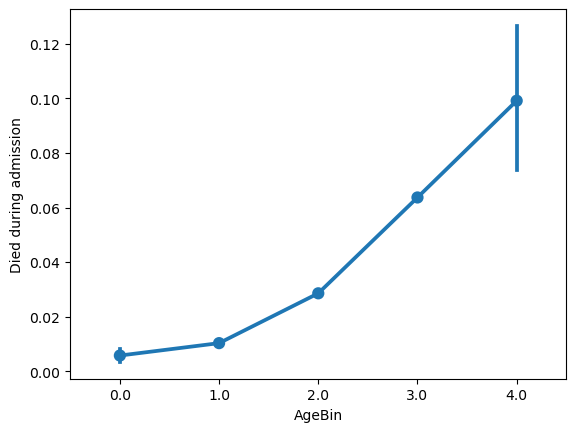

In [119]:
sns.pointplot(x = 'AgeBin', y = target,  data=data)

Text(0.5, 1.0, 'Age vs Races Readmission Comparison')

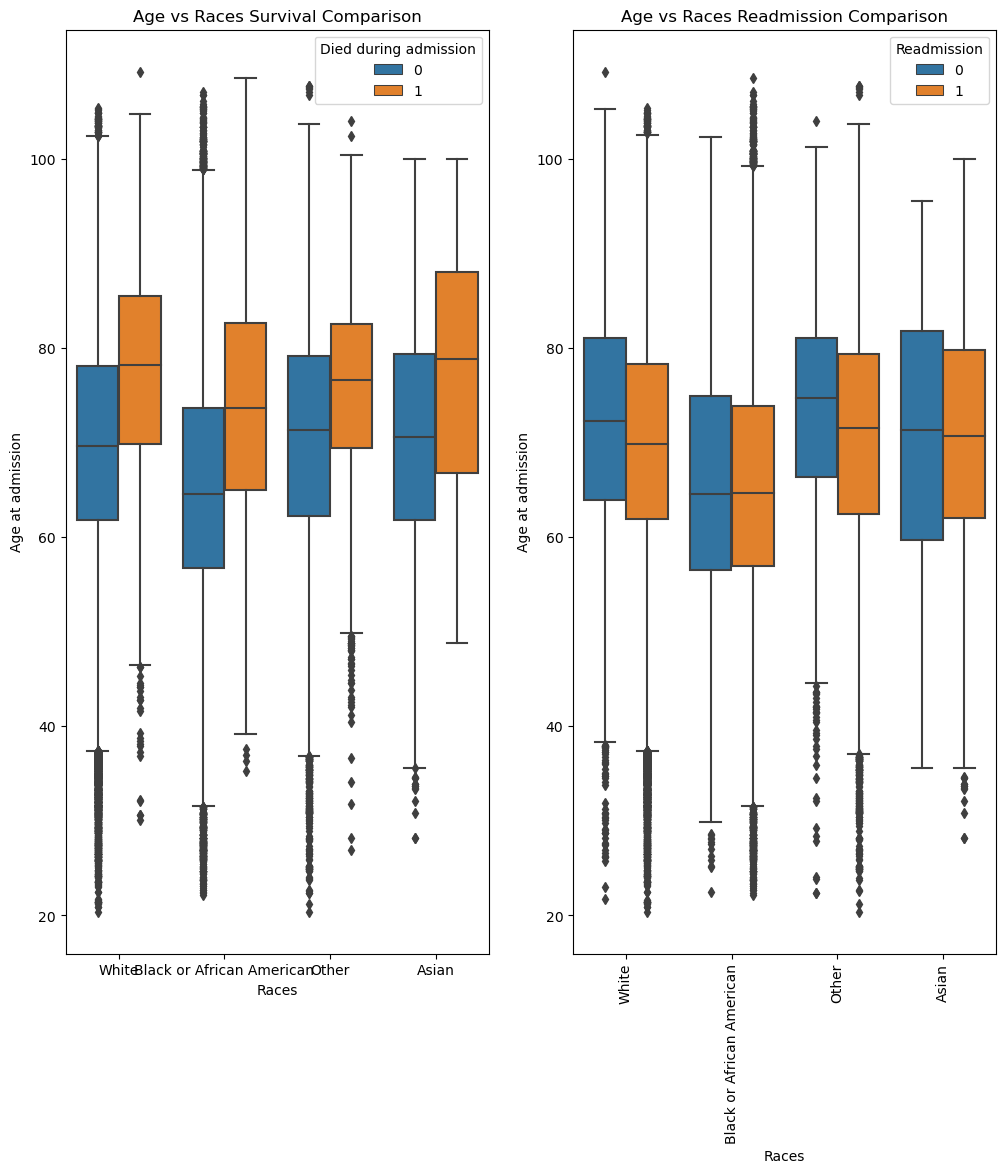

In [130]:
fig, (axis1, axis2)= plt.subplots(1,2,figsize=(12,12))

sns.boxplot(x = 'Races', y='Age at admission', hue = target, data = data, ax = axis1)
plt.xticks(rotation=90)
axis1.set_title('Age vs Races Survival Comparison')

sns.boxplot(x = 'Races', y='Age at admission', hue = target2, data = data, ax = axis2)
plt.xticks(rotation=90)
axis2.set_title('Age vs Races Readmission Comparison')


[Text(0.5, 1.0, 'Age vs Mortality Readmission Comparison')]

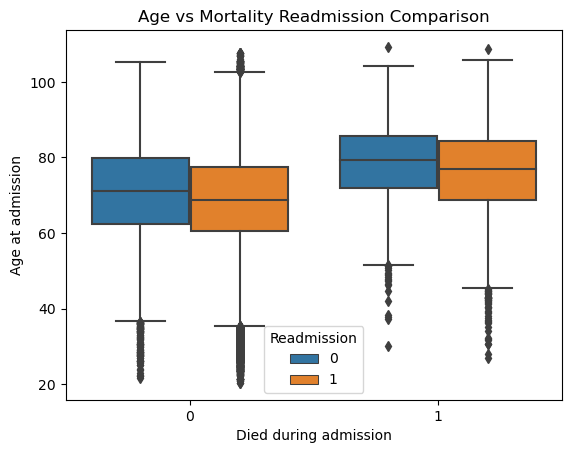

In [129]:
sns.boxplot(x = target, y='Age at admission', hue = target2, data = data).set(title = 'Age vs Mortality Readmission Comparison')

Text(0.5, 1.0, 'Age vs Gender Readmission Comparison')

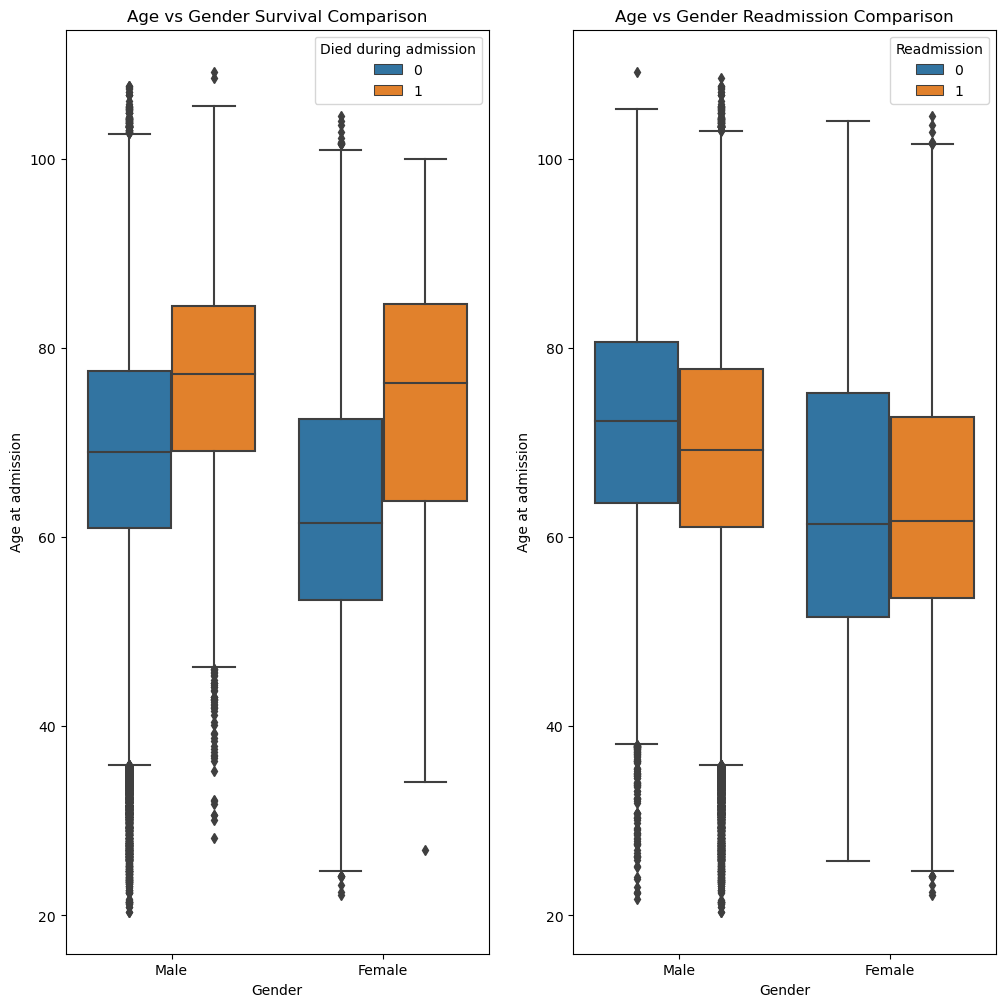

In [128]:
fig, (axis1, axis2) = plt.subplots(1,2,figsize=(12,12))

sns.boxplot(x = 'Gender', y='Age at admission', hue = target, data = data, ax = axis1)
axis1.set_title('Age vs Gender Survival Comparison')

sns.boxplot(x = 'Gender', y ='Age at admission', hue = target2, data = data, ax = axis2)
axis2.set_title('Age vs Gender Readmission Comparison')

<Axes: xlabel='Gender', ylabel='Readmission'>

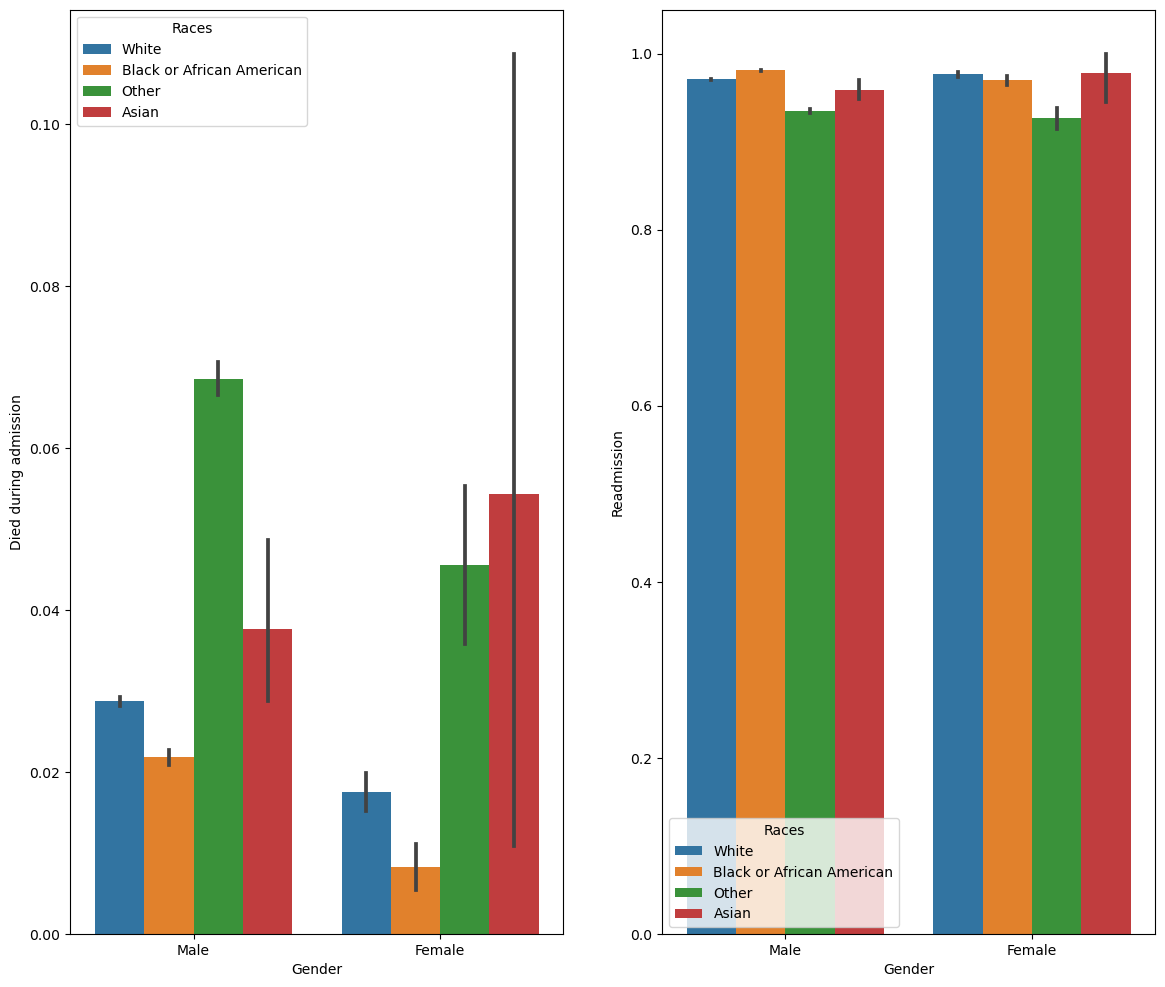

In [127]:
fig, qaxis = plt.subplots(1,2,figsize=(14,12))

sns.barplot(x = 'Gender', y = target, hue = 'Races', data=data, ax = qaxis[0])

sns.barplot(x = 'Gender', y = target2, hue = 'Races', data=data, ax  = qaxis[1])

<Axes: xlabel='AgeBin', ylabel='Readmission'>

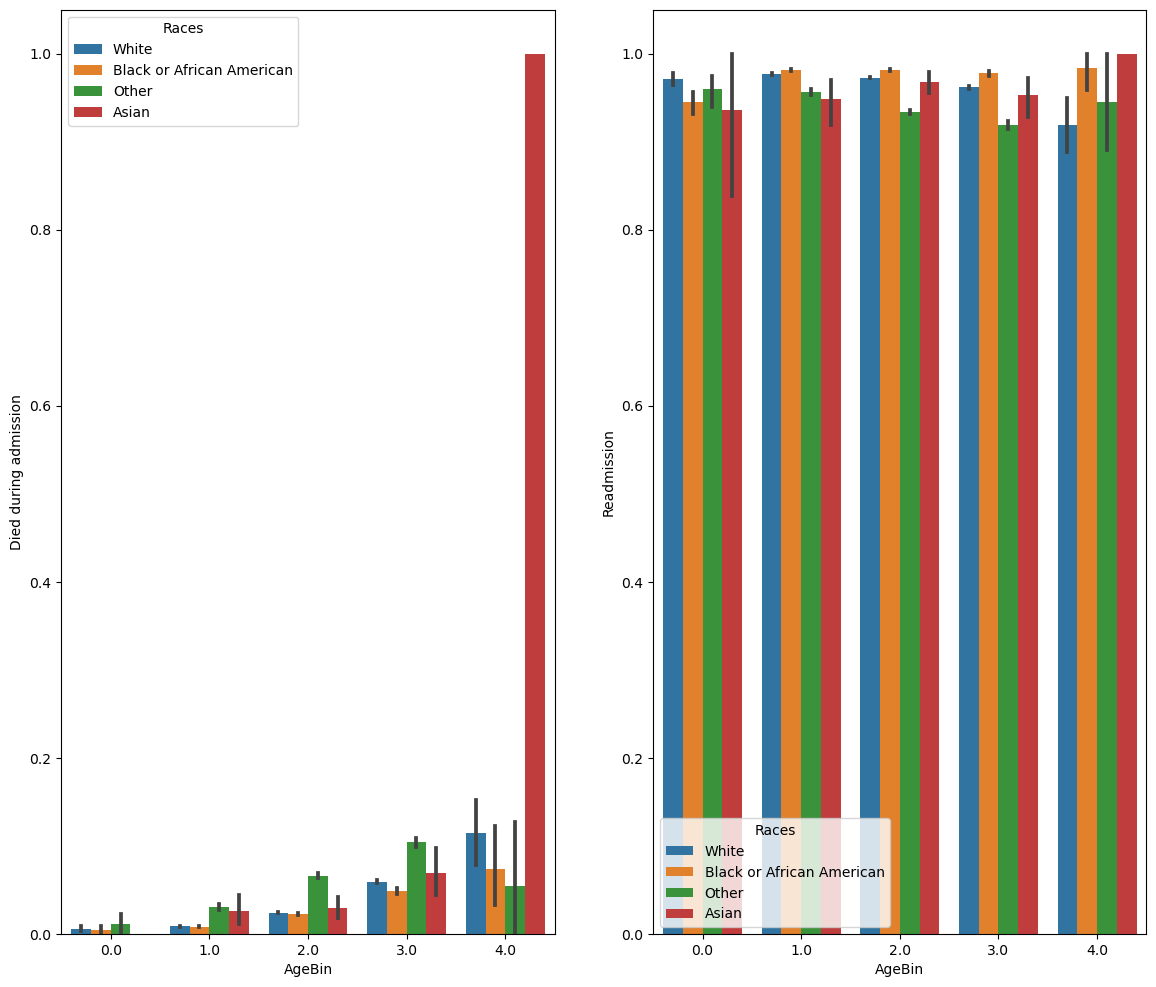

In [126]:
fig, qaxis = plt.subplots(1,2,figsize=(14,12))

sns.barplot(x = 'AgeBin', y = target, hue = 'Races', data=data, ax = qaxis[0])
sns.barplot(x = 'AgeBin', y = target2, hue = 'Races', data=data, ax = qaxis[1])


<Axes: xlabel='AgeBin', ylabel='Readmission'>

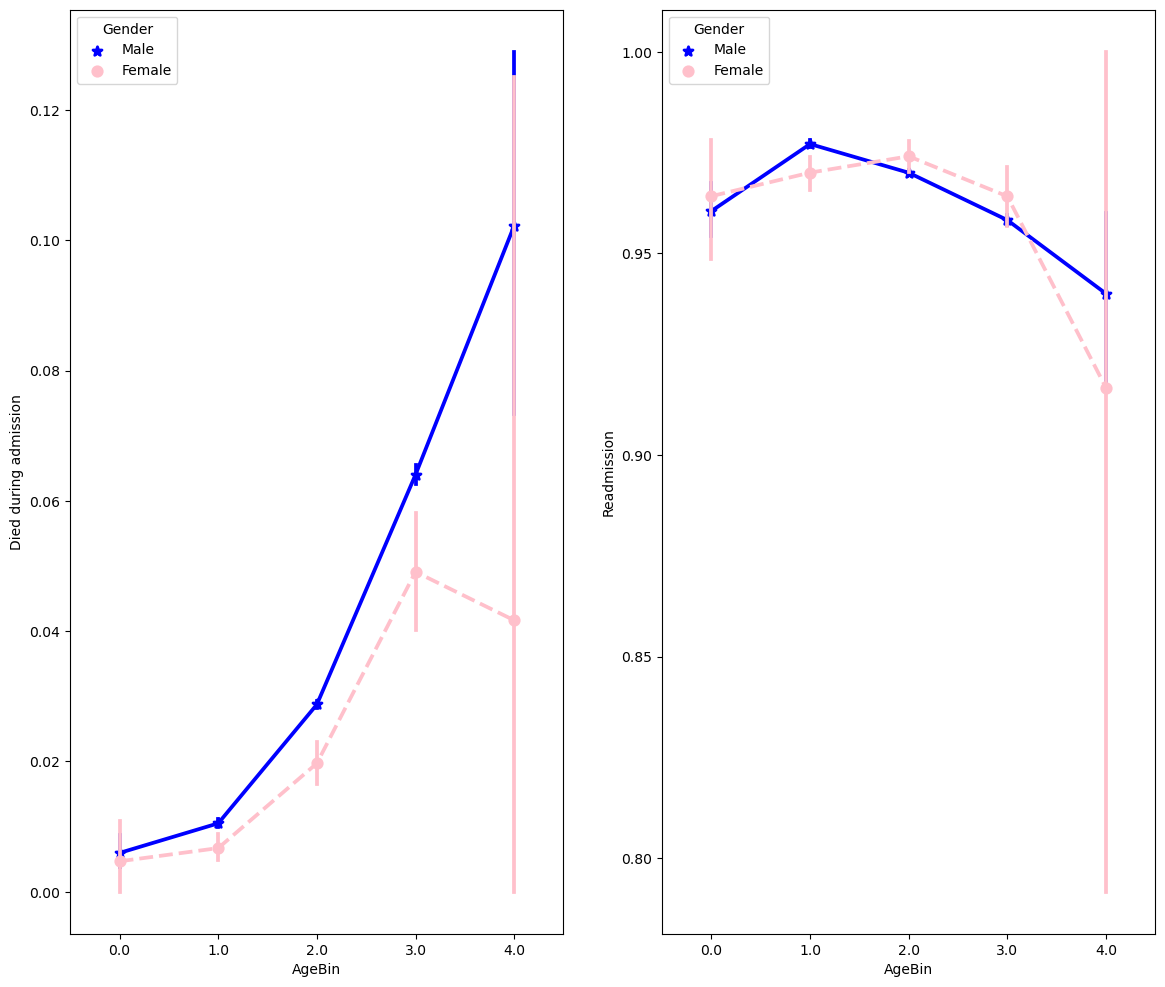

In [124]:
#more side-by-side comparisons
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does family size factor with sex & survival compare
sns.pointplot(x="AgeBin", y=target, hue="Gender", data=data,
              palette={"Male": "blue", "Female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis1)

#how does class factor with sex & survival compare
sns.pointplot(x="AgeBin", y=target2, hue="Gender", data=data,
              palette={"Male": "blue", "Female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax = maxis2)

<Axes: xlabel='AgeBin', ylabel='Died during admission'>

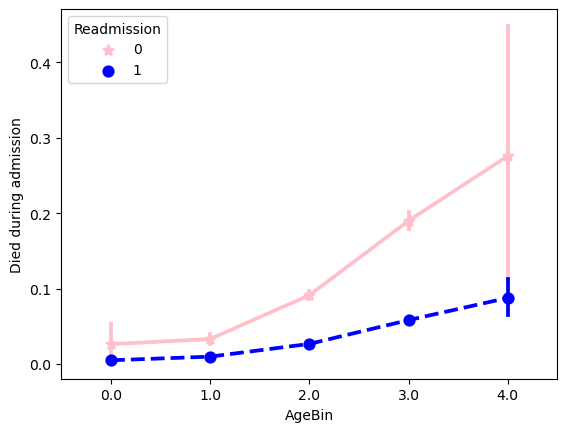

In [120]:
sns.pointplot(x="AgeBin", y=target, hue=target2, data=data,
              palette={1: "blue", 0: "pink"},
              markers=["*", "o"], linestyles=["-", "--"])

<Axes: xlabel='AgeBin', ylabel='Readmission'>

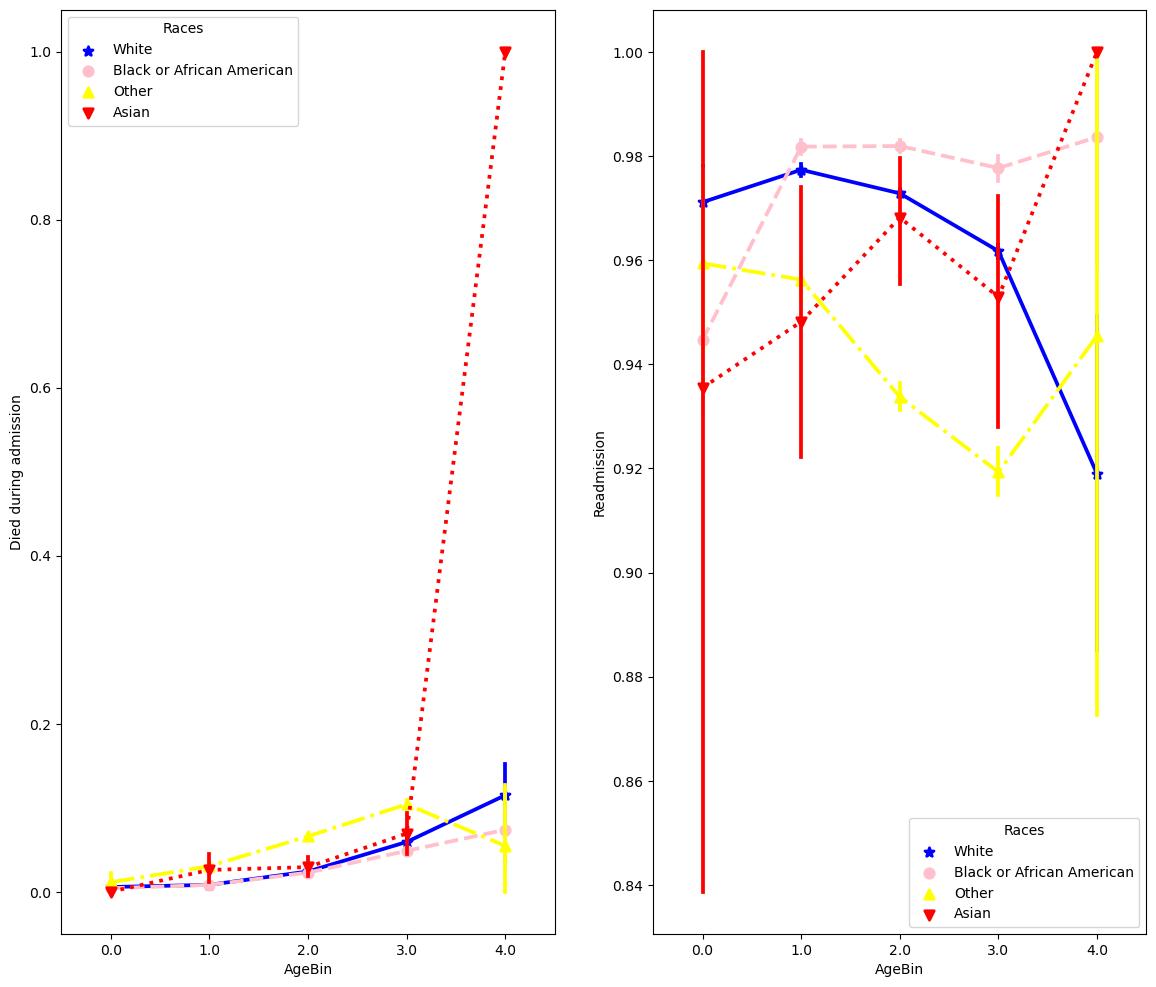

In [121]:
#more side-by-side comparisons
fig, (maxis1, maxis2) = plt.subplots(1, 2,figsize=(14,12))

#how does agebin factor with races & survival compare
sns.pointplot(x="AgeBin", y=target, hue="Races", data=data,
              palette={'White': "blue", 'Black or African American': "pink", 'Asian':'red','Hispanic or Latino':'green','Other':'yellow'},
              markers=["*", "o","^",'v', '.'], linestyles=["-", "--", "-.",":",'-.'], ax = maxis1)

#how does class factor with races & readmission compare
sns.pointplot(x="AgeBin", y=target2, hue="Races", data=data,
              palette={'White': "blue", 'Black or African American': "pink", 'Asian':'red','Hispanic or Latino':'green','Other':'yellow'},
              markers=["*", "o","^",'v', '.'], linestyles=["-", "--", "-.",":",'-.'], ax = maxis2)

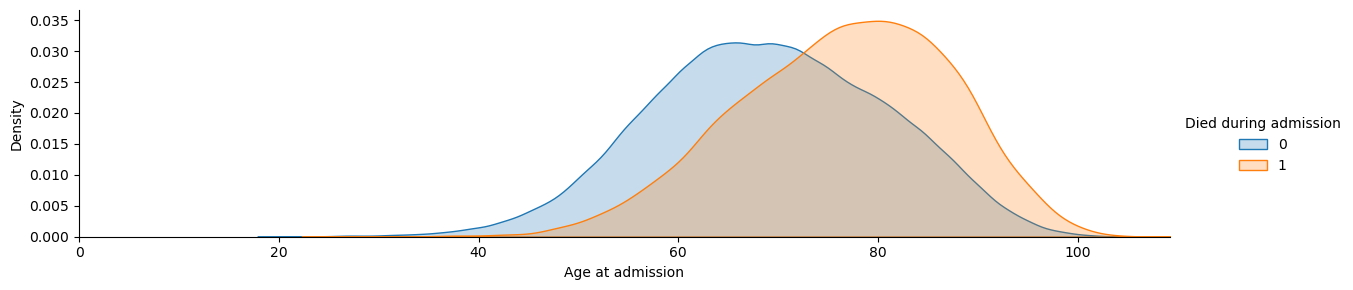

In [122]:
#plot distributions of age of patients who survived or did not survive
a = sns.FacetGrid( data, hue = target, aspect=4)
a.map(sns.kdeplot, 'Age at admission', fill= True )
a.set(xlim=(0 , data['Age at admission'].max()))
a.add_legend()

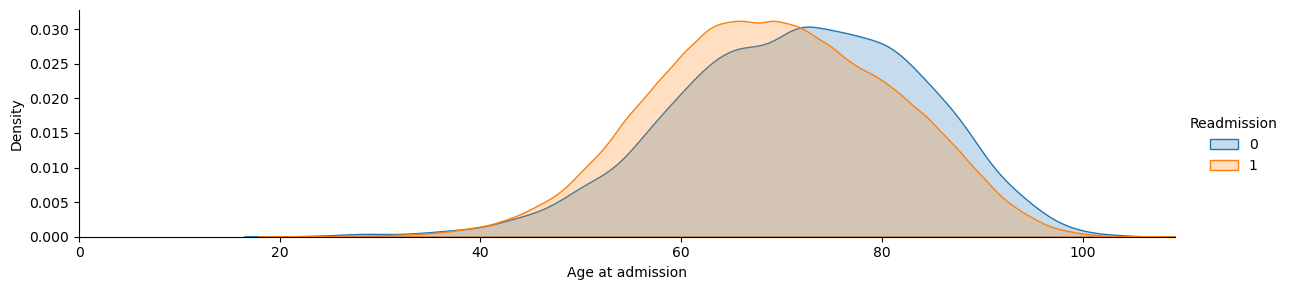

In [123]:
#plot distributions of age of patients who survived or did not survive
a = sns.FacetGrid( data, hue = target2, aspect=4)
a.map(sns.kdeplot, 'Age at admission', fill= True)
a.set(xlim=(0 , data['Age at admission'].max()))
a.add_legend()

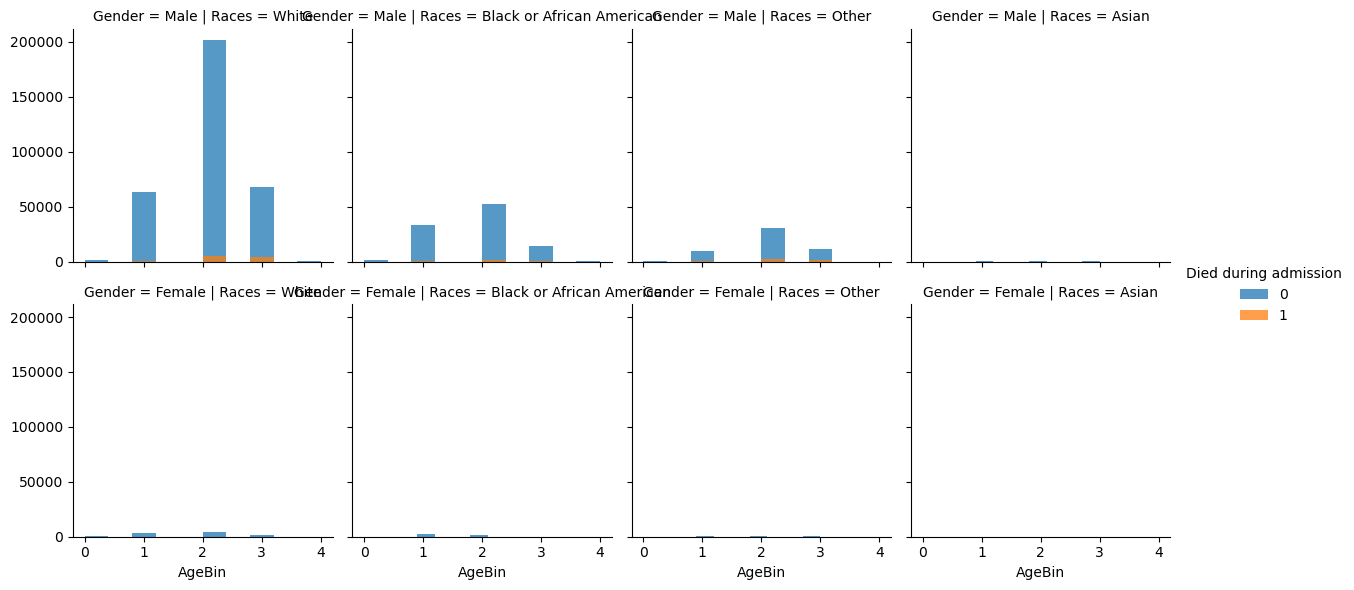

In [131]:
#histogram comparison of gender,races, and age by survival
h = sns.FacetGrid(data, row = 'Gender', col = 'Races', hue = target)
h.map(plt.hist, 'AgeBin', alpha = .75)
h.add_legend()

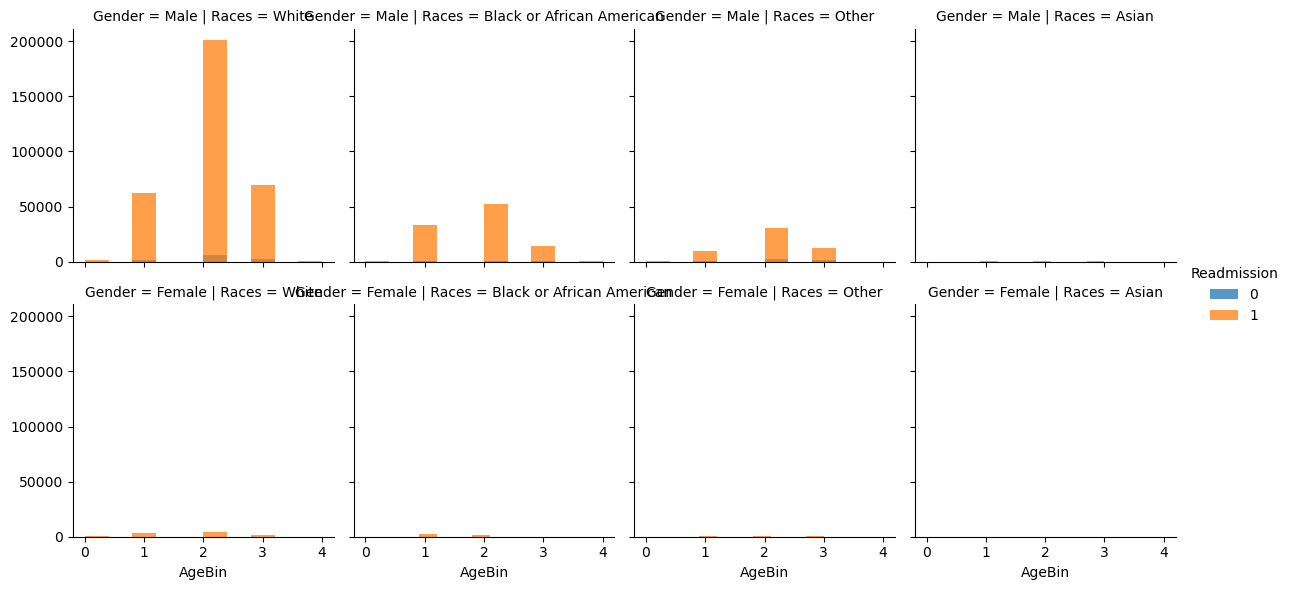

In [132]:
#histogram comparison of gender,races, and age by readmisison
h = sns.FacetGrid(data, row = 'Gender', col = 'Races', hue = target2)
h.map(plt.hist, 'AgeBin', alpha = .75)
h.add_legend()

/tmp/ipykernel_42038/2459217434.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


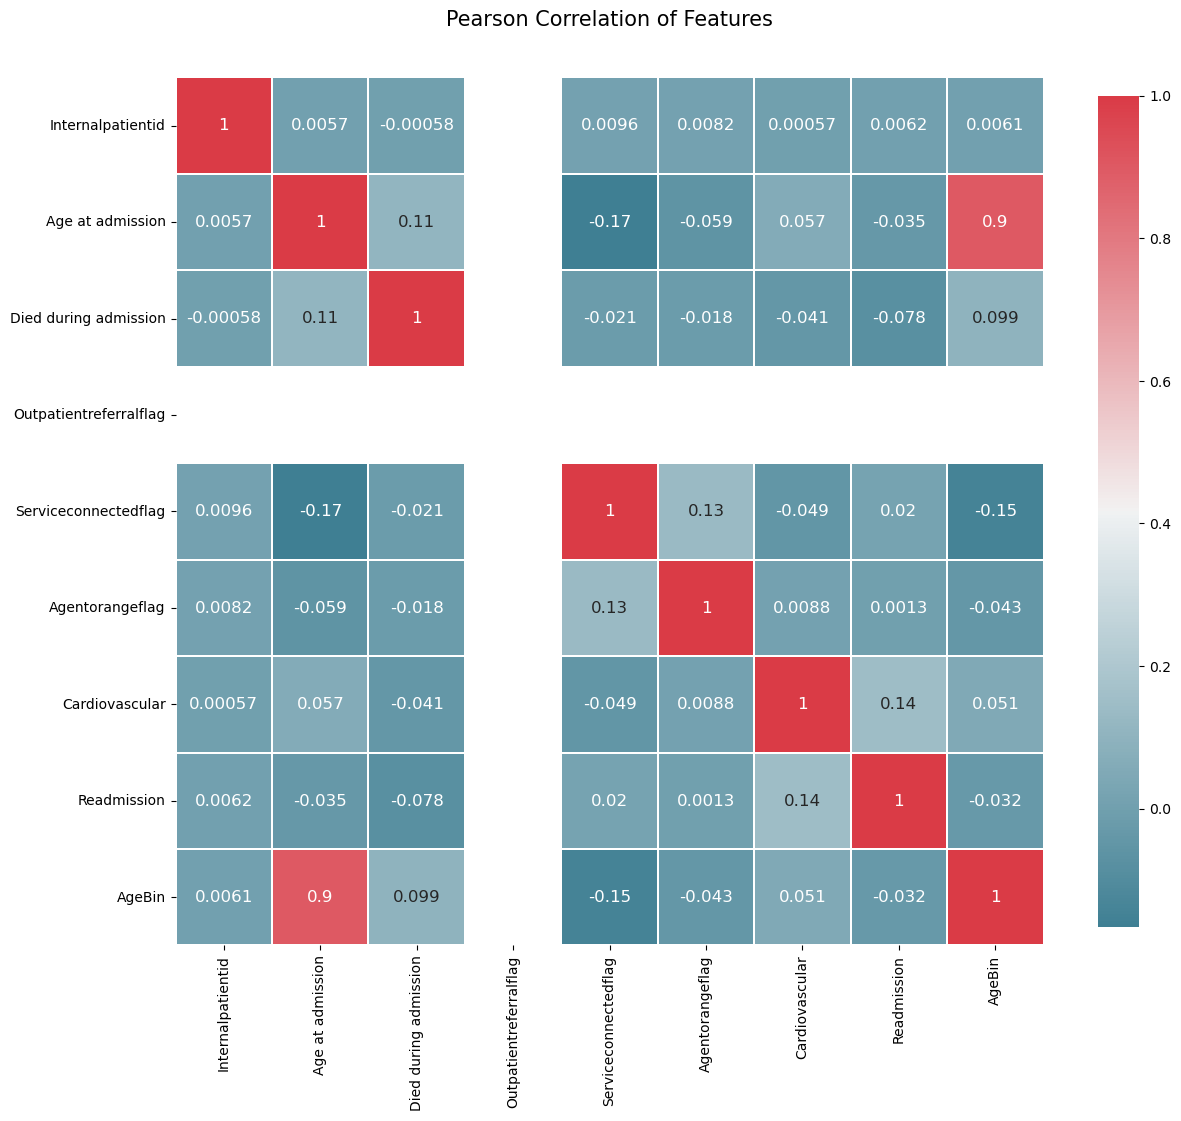

In [141]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

#correlation_heatmap(data[orig_cols+[target, target2]])
correlation_heatmap(inpatient_enth)

Canonical Correlation

In [155]:
inpatient_enth3 = inpatient_admissions_train.merge(demographics_static_train3, how = 'inner', suffixes=(' ', ' '), on = 'Internalpatientid')
inpatient_enth3.head()

,Internalpatientid,Age at admission,Admission date,Discharge date,Admitting unit service,Discharging unit service,Admitting specialty,Discharging specialty,First listed discharge diagnosis icd10 subcategory,Second listed discharge diagnosis icd10 subcategory,...,Veteran flag,Gender,Veteran flag,Ethnicity_0,Ethnicity_1,Ethnicity_2,Races_0,Races_1,Races_2,Races_3
0,10,65.649075,2015-11-28 17:41:09.0,2015-11-29 01:43:14.0,NON-COUNT,NON-COUNT,DRUG DEPENDENCE TRMT UNIT,MEDICAL OBSERVATION,"Pneumonia, unspecified organism",Hypokalemia,...,Yes,1,Yes,0,1,0,1,0,0,0
1,100001,83.767138,2009-10-01 21:19:50.0,2009-10-04 16:51:33.0,MEDICINE,MEDICINE,PSYCHIATRIC MENTALLY INFIRM,GENERAL(ACUTE MEDICINE),"Pneumonia, unspecified organism",Essential (primary) hypertension,...,Yes,1,Yes,0,1,0,1,0,0,0
2,100001,84.873295,2010-11-10 04:32:39.0,2010-11-19 08:49:45.0,SURGERY,SURGERY,SUBSTANCE ABUSE RES TRMT PROG,ORTHOPEDIC,"Osteoarthritis, unspecified site",Type 2 diabetes mellitus with neurological com...,...,Yes,1,Yes,0,1,0,1,0,0,0
3,100001,84.898357,2010-11-19 08:23:30.0,2010-11-26 11:03:10.0,NHCU,NHCU,LONG TERM PSYCHIATRY(>45 DAYS),NH SHORT STAY REHABILITATION,Encounter for other specified aftercare,Presence of orthopedic joint implants ; Presen...,...,Yes,1,Yes,0,1,0,1,0,0,0
4,100001,86.568969,2012-07-21 23:00:00.0,2012-07-22 19:18:48.0,MEDICINE,MEDICINE,PM&R TRANSITIONAL REHAB,CARDIAC INTENSIVE CARE UNIT,"Atrioventricular block, second degree","Obesity, unspecified",...,Yes,1,Yes,0,1,0,1,0,0,0


In [159]:
X = inpatient_enth3[['Races','Age at admission']]
Y = inpatient_enth3[[target,target2]]

from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import CCA

scaler = StandardScaler() 
X1 = scaler.fit_transform(X) #scale data
Y1 = scaler.fit_transform(Y) 
cca = CCA(scale=False, n_components=2)
cca.fit(X1, Y1) #fit our scaled data
X1_c, X2_c = cca.transform(X1,Y1) 

In [160]:
print(cca.y_loadings_)

[[ 0.9556985   0.23683392]
 [-0.30186121  0.97155015]]


In [161]:
coef_df = pd.DataFrame(np.round(cca.coef_, 2), columns = [Y.columns])
coef_df.index = X.columns
coef_df 

/home/hassan/.conda/envs/mla/lib/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:503: FutureWarning: The attribute `coef_` will be transposed in version 1.3 to be consistent with other linear models in scikit-learn. Currently, `coef_` has a shape of (n_features, n_targets) and in the future it will have a shape of (n_targets, n_features).
  warnings.warn(


,Died during admission,Readmission
Races,0.35,0.94
Age at admission,0.95,-0.29
